# 作业9：图像退化模型 

作业目的：掌握经典的图像退化模型

In [158]:
import numpy as np
import random
from matplotlib import pyplot as plt
from skimage import color, data, restoration,io
import math
import scipy.signal

Text(0.5, 1.0, 'Original Image')

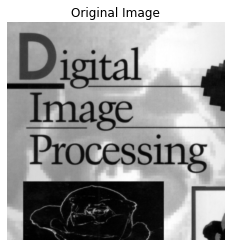

In [159]:
img=io.imread('./img/original_DIP.tif')
plt.imshow(img,'gray')
plt.axis('off')
plt.title('Original Image')

作业内容：

    （1）利用教材给定的图像运动模糊退化模型

$ H(u,v) = \frac{1}{\pi(ua+vb)}sin[\pi(ua+vb)]e^{-j\pi(ua+vb)} $
    
    对附件的图像进行处理，得到运动模糊图像，改变a,b的数值和符号，观察模糊的方向和程度
    
    分析a=0.1或-0.1,b=0.1或-0.1四种参数组合对模糊方向的影响

In [160]:
def blur(img,a,b,T=1):
    img_fft=np.fft.fft2(img)
    [height,width] = img_fft.shape
    HMatrix=np.zeros((height,width),dtype='complex')
    for x in range(height):
        for y in range(width):
            if x >= height/2:
                x = x - height
            if y >= width /2:
                y = y - width
            aAndb=np.pi * (x * a + y * b)
            if aAndb==0:
                HMatrix[x,y]=1
            else:
                HMatrix[x,y]=T / aAndb * np.sin(x) * np.exp(-1j*x)

    degradation_fft = img_fft * HMatrix
    img = np.abs(np.fft.ifft2(degradation_fft))
    return img

In [161]:
img1 = blur(img,a= 0.1,b= 0.1)
img2 = blur(img,a=-0.1,b= 0.1)
img3 = blur(img,a= 0.1,b=-0.1)
img4 = blur(img,a=-0.1,b=-0.1)

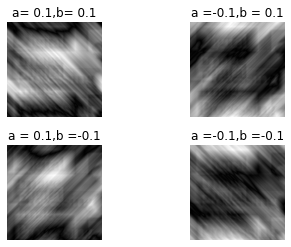

In [162]:
plt.subplot(221)
plt.imshow(img1,cmap='gray')
plt.title('a= 0.1,b= 0.1')
plt.axis('off')

plt.subplot(222)
plt.imshow(img2,cmap='gray')
plt.title('a =-0.1,b = 0.1')
plt.axis('off')

plt.subplot(223)
plt.imshow(img3,cmap='gray')
plt.title('a = 0.1,b =-0.1')
plt.axis('off')

plt.subplot(224)
plt.imshow(img4,cmap='gray')
plt.title('a =-0.1,b =-0.1')
plt.axis('off')

plt.subplots_adjust(hspace=0.3)

分析a=0.1或-0.1,b=0.1或-0.1四种参数组合对模糊方向的影响

    答：我们在观察这个移动方向的时候发现

    a>0 b>0 向 右下方 漂移 与 a<0 b>0 y轴对称

    a<0 b>0 向 左下方 漂移 与 a>0 b<0 中心对称

    a>0 b<0 向 右上方 漂移 与 a<0 b>0 中心对称

    a<0 b<0 向 左上方 漂移 与 a<0 b>0  x轴对称

    发现a的正负决定 漂移的 斜方向的左右
    发现b的正负决定 漂移的 斜方向的上下

    （2）给运动模糊图像加入均值为零，方差为0.01的高斯噪声，观察加入噪声的图像

(-0.5, 687.5, 687.5, -0.5)

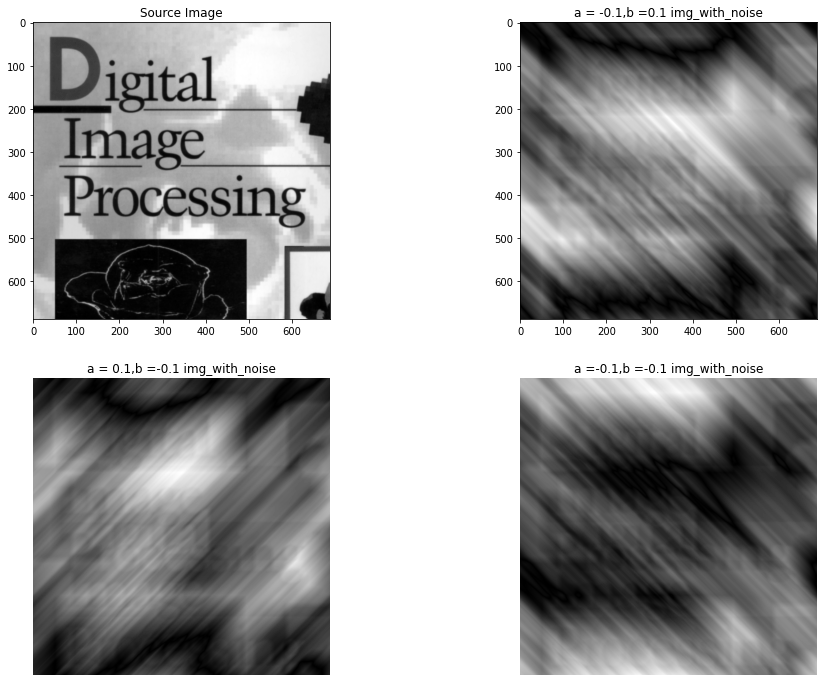

In [170]:
def gaussian_white_noise(img, mu, sigma):
    '''
    加性高斯白噪声（适用于灰度图）
    :param img: 输入图像
    :param mu: 均值
    :param sigma: 标准差
    :return:
    '''
    img_cp = np.copy(img)  # 输入图像的副本

    img_cp += np.random.normal(mu,sigma,img.shape)

    return img_cp


# 运动模糊后的图像
img=img1


mu=0

sigma=0.01

# 增加加性高斯白噪声
img_with_noise = gaussian_white_noise(img, mu, sigma)

# 原图
plt.figure(figsize=(16,12))
plt.subplot(2, 2, 1)
plt.title("Source Image")
plt.imshow(io.imread('./img/original_DIP.tif'), cmap="gray")

# 加入高斯噪声的图像
plt.subplot(2, 2, 2)
plt.title("a = -0.1,b =0.1 img_with_noise")
plt.imshow(img_with_noise, cmap="gray")

plt.subplot(223)
plt.imshow(gaussian_white_noise(img3, mu, sigma),cmap='gray')
plt.title('a = 0.1,b =-0.1 img_with_noise')
plt.axis('off')

plt.subplot(224)
plt.imshow(gaussian_white_noise(img4, mu, sigma),cmap='gray')
plt.title('a =-0.1,b =-0.1 img_with_noise')
plt.axis('off')


作业提交：

    （1）PDF格式报告

    （2）在文档中包含实现图像退化模型的源代码

    （3）分析a=0.1或-0.1,b=0.1或-0.1四种参数组合对模糊方向的影响